# **LeNet-5 Architecture (Convolutional-Neural-Network-for-Handwritten-Character-Recognition)**

Main components of CNNs :  
CNN consists of two major components Conv layers and MaxPooling Layers,The elements of a convolutional neural network, such as convolutional and pooling layers, are relatively straightforward to understand.

The challenging part of using convolutional neural networks in practice is how to design model architectures that best use these simple elements

        
let us show some architectures of the CNNs
1-LeNET5 : Perhaps the first widely known and successful application of convolutional neural networks was LeNet-5, described by Yann LeCun, et al. in their 1998 paper titled “Gradient-Based Learning Applied to Document Recognition" [pdf](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)
  

[content](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Architecture-of-the-LeNet-5-Convolutional-Neural-Network-for-Handwritten-Character-Recognition-1024x295.png)

The pattern of blocks of convolutional layers and pooling layers grouped together and repeated remains a common pattern in designing and using convolutional neural networks today, more than twenty years later.

Interestingly, the architecture uses a small number of filters as the first hidden layer, specifically six filters each with the size of 5×5 pixels. After pooling (called a subsampling layer), another convolutional layer has many more filters, again with a smaller size but smaller than the prior convolutional layer, specifically 16 filters with a size of 5×5 pixels, again followed by pooling. In the repetition of these two blocks of convolution and pooling layers, the trend is an increase in the number of filters.


Compared to modern applications, the number of filters is also small, but the trend of increasing the number of filters with the depth of the network also remains a common pattern in modern usage of the technique.

The flattening of the feature maps and interpretation and classification of the extracted features by fully connected layers also remains a common pattern today. In modern terminology, the final section of the architecture is often referred to as the classifier, whereas the convolutional and pooling layers earlier in the model are referred to as the feature extractor."


to summurize LENET-5 :
1- Fixed-sized input images.
2- Group convolutional and pooling layers into blocks.
3- Repetition of convolutional-pooling blocks in the architecture.
4-Increase in the number of filters with the depth of the network.
5-Distinct feature extraction and classifier parts of the architecture.


In [2]:
  
# Note : LeNet is not built-in in keras
from keras import models, layers
import keras
class LeNet(models.Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()
    self.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"))  # feature map=6
    self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    self.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    self.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    self.add(layers.Flatten())
    self.add(layers.Dense(84, activation='tanh'))
    self.add(layers.Dense(nb_classes , activation='softmax')) #nb_classes = 10
    self.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD')
    self.summary()

# This represents the bright beginning of CNN architectures
     

# **ALEXNET Architecture for Object Photo Classification**

The work that perhaps could be credited with sparking renewed interest in neural networks and the beginning of the dominance of deep learning in many computer vision applications was the 2012 paper by Alex Krizhevsky, et al. titled “ImageNet Classification with Deep Convolutional Neural Networks.

The paper describes a model later referred to as “AlexNet” designed to address the ImageNet Large Scale Visual Recognition Challenge or ILSVRC-2010 competition for classifying photographs of objects into one of 1,000 different categories.

The ILSVRC was a competition held from 2011 to 2016, competition for classifying photographs of objects (1000 object classes/categories) designed to spur innovation in the field of computer vision. Before the development of AlexNet, the task was thought very difficult and far beyond the capability of modern computer vision methods. AlexNet successfully demonstrated the capability of the convolutional neural network model in the domain, and kindled a fire that resulted in many more improvements and innovations, many demonstrated on the same ILSVRC task in subsequent years. More broadly, the paper showed that it is possible to develop deep and effective end-to-end models for a challenging problem without using unsupervised pretraining techniques that were popular at the time.


Important in the design of AlexNet was a suite of methods that were new or successful, but not widely adopted at the time. Now, they have become requirements when using CNNs for image classification.


AlexNet made use of the rectified linear activation function, or ReLU, as the nonlinearly after each convolutional layer, instead of S-shaped functions such as the logistic or tanh that were common up until that point. Also, a softmax activation function was used in the output layer, now a staple for multi-class classification with neural networks.


The average pooling used in LeNet-5 was replaced with a max pooling method, although in this case, overlapping pooling was found to outperform non-overlapping pooling that is commonly used today (e.g. stride of pooling operation is the same size as the pooling operation, e.g. 2 by 2 pixels). To address overfitting, the newly proposed dropout method was used between the fully connected layers of the classifier part of the model to improve generalization error.

The architecture of AlexNet is deep and extends upon some of the patterns established with LeNet-5. The image below, taken from the paper, summarizes the model architecture, in this case, split into two pipelines to train on the GPU hardware of the time.

[paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

#### AlexNet Structure : [link](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Architecture-of-the-AlexNet-Convolutional-Neural-Network-for-Object-Photo-Classification-1024x341.png)
 
Input images were fixed to the size 224×224 with three color channels. In terms of the number of filters used in each convolutional layer, the pattern of increasing the number of filters with depth seen in LeNet was mostly adhered to, in this case, the sizes: 96, 256, 384, 384, and 256. Similarly, the pattern of decreasing the size of the filter (kernel) with depth was used, starting from the smaller size of 11×11 and decreasing to 5×5, and then to 3×3 in the deeper layers. Use of small filters such as 5×5 and 3×3 is now the nor

* Use of the ReLU activation function after convolutional layers and softmax for the output layer.
* Use of Max Pooling instead of Average Pooling.
* Use of Dropout regularization between the fully connected layers.
* Pattern of convolutional layer fed directly to another convolutional layer.
* Use of Data Augmentation.

  

In [6]:
#Multi class classification
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
#input image RGB channel 3  with size 227 * 227
np.random.seed(1000)

#Instantiate an empty model
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))
model.summary()
# Compile the model\n",
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"]) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                    

# **VGG Architecture = Visual Geometry Group**

The development of deep convolutional neural networks for computer vision tasks appeared to be a little bit of a dark art after AlexNet.

An important work that sought to standardize architecture design for deep convolutional networks and developed much deeper and better performing models in the process was the 2014 paper titled “Very Deep Convolutional Networks for Large-Scale Image Recognition” by Karen Simonyan and Andrew Zisserman.


Their architecture is generally referred to as VGG after the name of their lab, the Visual Geometry Group at Oxford. Their model was developed and demonstrated on the sameILSVRC competition, in this case, the ILSVRC-2014 version of the challenge.



The first important difference that has become a de facto standard is the use of a large number of small filters. Specifically, filters with the size 3×3 and 1×1 with the stride of one, different from the large sized filters in LeNet-5 and the smaller but still relatively large filters and large stride of four in AlexNet.


Max pooling layers are used after most, but not all, convolutional layers, learning from the example in AlexNet, yet all pooling is performed with the size 2×2 and the same stride, that too has become a de facto standard. Specifically, the VGG networks use examples of two, three, and even four convolutional layers stacked together before a max pooling layer is used. The rationale was that stacked convolutional layers with smaller filters approximate the effect of one convolutional layer with a larger sized filter, e.g. three stacked convolutional layers with 3×3 filters approximates one convolutional layer with a 7×7 filter.



Another important difference is the very large number of filters used. The number of filters increases with the depth of the model, although starts at a relatively large number of 64 and increases through 128, 256, and 512 filters at the end of the feature extraction part of the model.


A number of variants of the architecture were developed and evaluated, although two are referred to most commonly given their performance and depth. They are named for the number of layers: they are the VGG-16 and the VGG-19 for 16 and 19 learned layers respectively.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 128)     147584    
                                                           

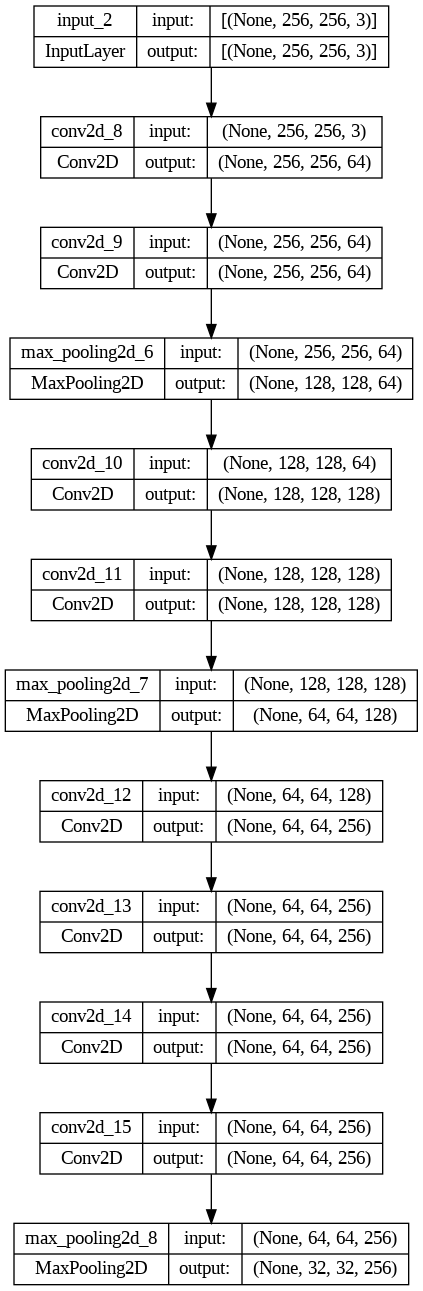

In [8]:
# Example of creating a CNN model with many VGG blocks
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import plot_model

# function for creating a vgg block
def vgg_block(layer_in, n_filters, n_conv):
  # add convolutional layers
  for _ in range(n_conv):
    layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
  # add max pooling layer
  layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
  return layer_in
# define model input
visible = Input(shape=(256, 256, 3))
# add vgg module
layer = vgg_block(visible, 64, 2)
# add vgg module
layer = vgg_block(layer, 128, 2)
# add vgg module
layer = vgg_block(layer, 256, 4)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='multiple_vgg_blocks.png')

to summarize VGG:
* Use of very small convolutional filters, e.g. 3×3 and 1×1 with a stride of *one.Use of max pooling with a size of 2×2 and a stride of the same dimensions.
* The importance of stacking convolutional layers together before using a pooling layer to define a block.
* Dramatic repetition of the convolutional-pooling block pattern.
* Development of very deep (16 and 19 layer) models.

# **Inception Architecture**


INCEPTION OR GOOGLENET:
Important innovations in the use of convolutional layers were proposed in the 2015 paper by Christian Szegedy, et al. titled “Going Deeper with Convolutions.

In the paper, the authors propose an architecture referred to as inception (or inception v1 to differentiate it from extensions) and a specific model called GoogLeNet that achieved top results in the 2014 version of the ILSVRC challenge.


The key innovation on the inception models is called the inception module. This is a block of parallel convolutional layers with different sized filters (e.g. 1×1, 3×3, 5×5) and a 3×3 max pooling layer, the results of which are then concatenated. Below is an example of the inception module taken from the paper.


A problem with a naive implementation of the inception model is that the number of filters (depth or channels) begins to build up fast, especially when inception modules are stacked.

Performing convolutions with larger filter sizes (e.g. 3 and 5) can be computationally expensive on a large number of filters. To address this, 1×1 convolutional layers are used to reduce the number of filters in the inception model. Specifically before the 3×3 and 5×5 convolutional layers and after the pooling layer. (dimensionality reduction)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_16 (Conv2D)             (None, 256, 256, 64  256         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_17 (Conv2D)             (None, 256, 256, 12  3584        ['input_3[0][0]']                
                                8)                                                          

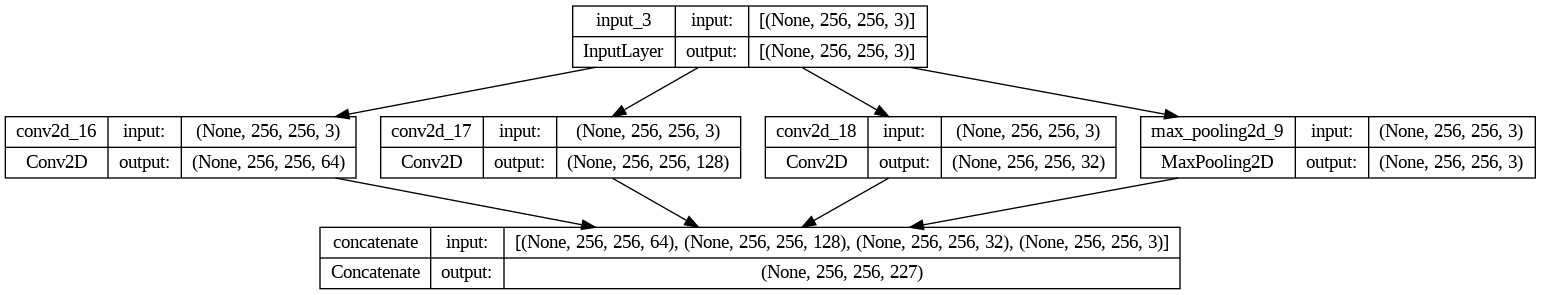

In [10]:
# example of creating a CNN with a naive inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from keras.utils import plot_model
# function for creating a naive inception block
def naive_inception_module(layer_in, f1, f2, f3):
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3x3 conv\n",
  conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
  # 5x5 conv
  conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
  # 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out
#define model input
visible = Input(shape=(256, 256, 3))
#add inception module
layer = naive_inception_module(visible, 64, 128, 32)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='naive_inception_module.png')

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 256, 256, 96  384         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 256, 256, 16  64          ['input_4[0][0]']                
                                )                                                           

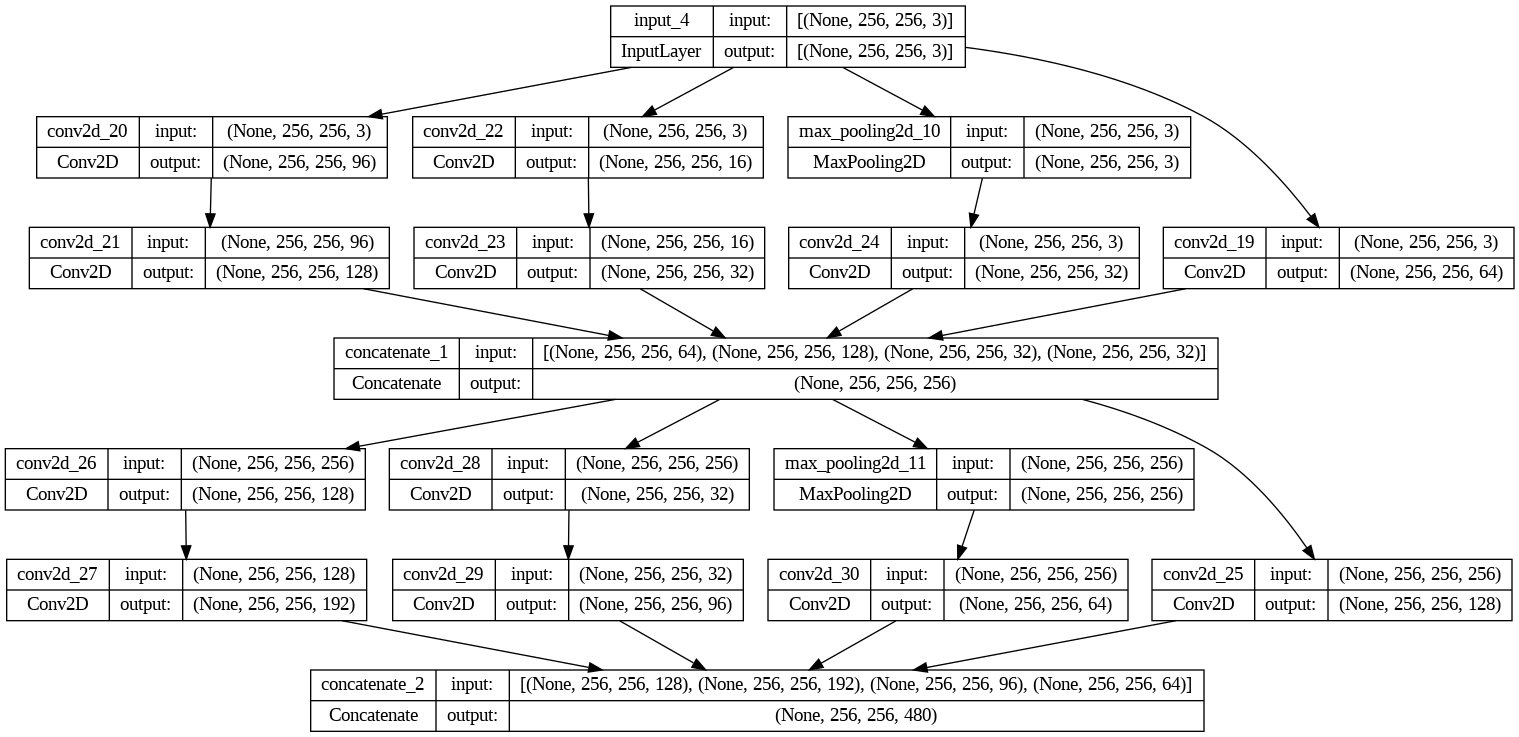

In [12]:
#Create CNN with inception V3
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from keras.utils import plot_model
# function for creating a projected inception module\n",
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
  # 1x1 conv
  conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  # 3x3 conv
  conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
  conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
  # 5x5 conv\n",
  conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
  conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
  # 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
  # concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
  return layer_out
# define model input
visible = Input(shape=(256, 256, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='inception_module.png')
      

 * Development and repetition of the Inception module.
 * Heavy use of the 1×1 convolution to reduce the number of channels.
 * Use of error feedback at multiple points in the network.
 * Development of very deep (22-layer) models.
 * Use of global average pooling for the output of the model.
 * => Inception V3 is much better that naive Inception

# **ResNet Architecture**

A final important innovation in convolutional neural nets that we will review was proposed by Kaiming He, et al. in their 2016 paper titled “Deep Residual Learning for Image Recognition.

In the paper, the authors proposed a very deep model called a Residual Network, or ResNet for short, an example of which achieved success on the 2015 version of the ILSVRC challenge.

Their model had an impressive 152 layers. Key to the model design is the idea of residual blocks that make use of shortcut connections. These are simply connections in the network architecture where the input is kept as-is (not weighted) and passed on to a deeper layer, e.g. skipping the next layer.


A residual block is a pattern of two convolutional layers with ReLU activation where the output of the block is combined with the input to the block, e.g. the shortcut connection. A projected version of the input used via 1×1 if the shape of the input to the block is different to the output of the block, so-called 1×1 convolutions. These are referred to as projected shortcut connections, compared to the unweighted or identity shortcut connections.


The authors start with what they call a plain network, which is a VGG-inspired deep convolutional neural network with small filters (3×3), grouped convolutional layers followed with no pooling in between, and an average pooling at the end of the feature detector part of the model prior to the fully connected output layer with a softmax activation function.


The plain network is modified to become a residual network by adding shortcut connections in order to define residual blocks. Typically the shape of the input for the shortcut connection is the same size as the output of the residual block.

We can summarize the key aspects of the architecture relevant in modern models as follows:
* Use of shortcut connections.
* Development and repetition of the residual blocks.
* Development of very deep (152-layer) models.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d_1[0][0]']               
                                )                                                             

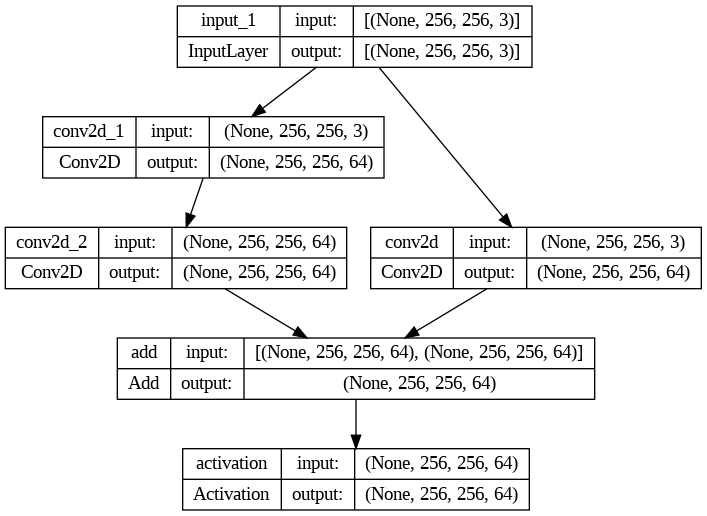

In [1]:
# example of a CNN model with an identity or projection residual module
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
from keras.utils import plot_model

# function for creating an identity or projection residual module
def residual_module(layer_in, n_filters):
  merge_input = layer_in
  # check if the number of filters needs to be increase, assumes channels last format
  if layer_in.shape[-1] != n_filters:
    merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  # conv1
  conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
  # conv2
  conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
  # add filters, assumes filters/channels last
  layer_out = add([conv2, merge_input])
  # activation function
  layer_out = Activation('relu')(layer_out)
  return layer_out
# define model input
visible = Input(shape=(256, 256, 3))
# add vgg module
layer = residual_module(visible, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='residual_module.png')

# **Applying  Image Classification with VGG16**



35363/35363 [==============================] - 0s 0us/step
racer (56.08%)


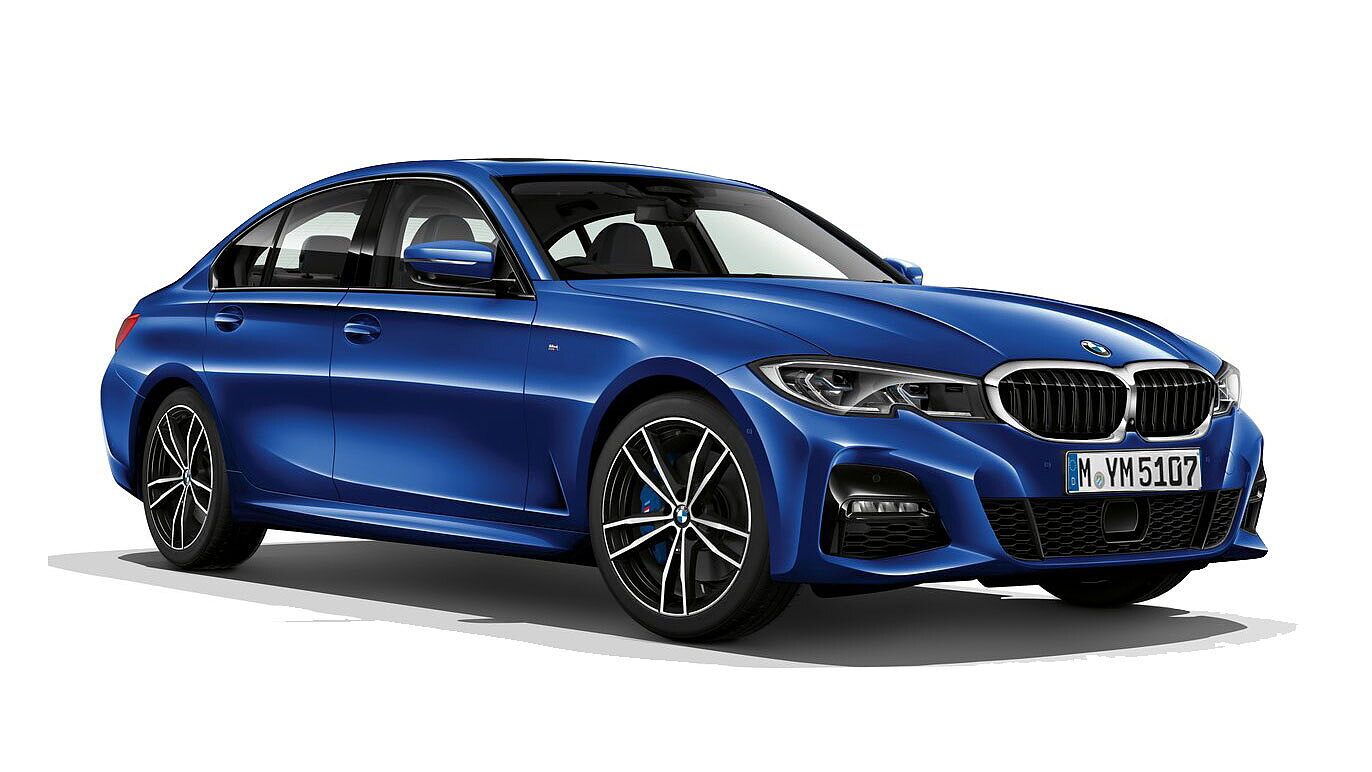

In [4]:
# apply a project of image classification using VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load an image from file
image = load_img('/content/img.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))
from IPython.display import Image
Image('/content/img.jpg')
Image('/content/img.jpg', width=224, height=224)

# **Applying  Image Classification with ResNet152**


In [18]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.resnet import preprocess_input, decode_predictions, ResNet152

# load an image from file
image = load_img('/content/img.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the ResNet152 model
image = preprocess_input(image)

# load the model
model = ResNet152()

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


242900224/242900224 [==============================] - 2s 0us/step


1/1 [==============================] - 3s 3s/step
racer (74.21%)


# **Applying  Image Classification with InceptionV3**


In [15]:
# To perform image classification using the InceptionV3 model:
#Note that we need to change the target_size parameter to (299, 299) as the InceptionV3 model expects 
# inputs of size 299x299. 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input, decode_predictions, InceptionV3

# load an image from file
image = load_img('/content/img.jpg', target_size=(299, 299))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the InceptionV3 model
image = preprocess_input(image)

# load the model
model = InceptionV3()

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


1/1 [==============================] - 2s 2s/step
sports_car (74.54%)


# **Applying  Image Classification with VGG19**


In [16]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import decode_predictions
from keras.applications.vgg19 import VGG19

# load an image from file
image = load_img('/content/img.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# load the model
model = VGG19()

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


1/1 [==============================] - 0s 170ms/step
racer (50.47%)


# **Applying  Image Classification with DenseNet**


In [20]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions, DenseNet121

# load an image from file
image = load_img('/content/img.jpg', target_size=(224, 224))

# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the DenseNet model
image = preprocess_input(image)

# load the model
model = DenseNet121()

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


33188688/33188688 [==============================] - 0s 0us/step


1/1 [==============================] - 2s 2s/step
racer (48.77%)


# **Applying  Image Classification with EfficientNet**


In [21]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions, EfficientNetB7

# load an image from file
image = load_img('/content/img.jpg', target_size=(600, 600))

# convert the image pixels to a numpy array
image = img_to_array(image)

# expand dimensions so that it represents a single sample
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the EfficientNetB7 model
image = preprocess_input(image)

# load the model
model = EfficientNetB7(weights='imagenet')

# predict the probability across all output classes
yhat = model.predict(image)

# decode the predictions
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))


1/1 [==============================] - 8s 8s/step
beach_wagon (49.15%)
